# Objective
The objective of this analysis is to determine indicators of heavy traffic on the I-94.

The data used in this analysis has been sourced from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume#) and made avaiable by John Hogue.

In [1]:
import pandas as pd
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [2]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [3]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


## Data summary
The data set imformation mentions that the data is hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. It also mentions that hourly weather features and holidays are included for impacts on traffic volume.

### Data columns
- **holiday** Categorical US National holidays plus regional holiday, Minnesota State Fair 
- **temp** Numeric Average temp in kelvin 
- **rain_1h** Numeric Amount in mm of rain that occurred in the hour 
- **snow_1h** Numeric Amount in mm of snow that occurred in the hour 
- **clouds_all** Numeric Percentage of cloud cover 
- **weather_main** Categorical Short textual description of the current weather 
- **weather_description** Categorical Longer textual description of the current weather 
- **date_time** DateTime Hour of the data collected in local CST time 
- **traffic_volume** Numeric Hourly I-94 ATR 301 reported westbound traffic volume

# Data cleaning
From the info above we can see that we have 9 columns of data and 48,204 rows. My initial impression of the data is that it looks clean and does not have any missing values.

It is also notable that the column heading are all in snake-case

# Analysis

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

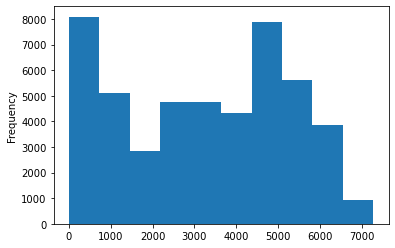

In [6]:
traffic['traffic_volume'].plot.hist()
plt.show()

In [7]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The "traffic_volume" series has values ranging from 0 through to 7280. Looking at the histogram above we can see that there are two peaks around 0 to 500 and another around 4500 to 5000. It seems possible that this distribution may be influenced by daytime and nighttime traffic patterns.

Let's divide our dataset into two parts:
- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [8]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


isolate the daytime/nighttime values and identify via a new series.

In [9]:
import datetime as dt
traffic['date_time'].dt.hour.value_counts().sort_index()

0     2037
1     2049
2     2019
3     2025
4     2091
5     2063
6     2087
7     2079
8     2080
9     2018
10    2078
11    1952
12    1955
13    1905
14    1969
15    1934
16    1988
17    1933
18    1986
19    1961
20    1979
21    1982
22    1994
23    2040
Name: date_time, dtype: int64

In [10]:
traffic_daytime = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]

In [11]:
traffic_daytime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.8+ MB


In [12]:
traffic_nighttime = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]

In [13]:
traffic_nighttime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24327 entries, 10 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              24327 non-null  object        
 1   temp                 24327 non-null  float64       
 2   rain_1h              24327 non-null  float64       
 3   snow_1h              24327 non-null  float64       
 4   clouds_all           24327 non-null  int64         
 5   weather_main         24327 non-null  object        
 6   weather_description  24327 non-null  object        
 7   date_time            24327 non-null  datetime64[ns]
 8   traffic_volume       24327 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.9+ MB


In [14]:
24327+23877

48204

Two new df created for daytime and night time. 

See add check above to confirm we still have 48,204 rows.

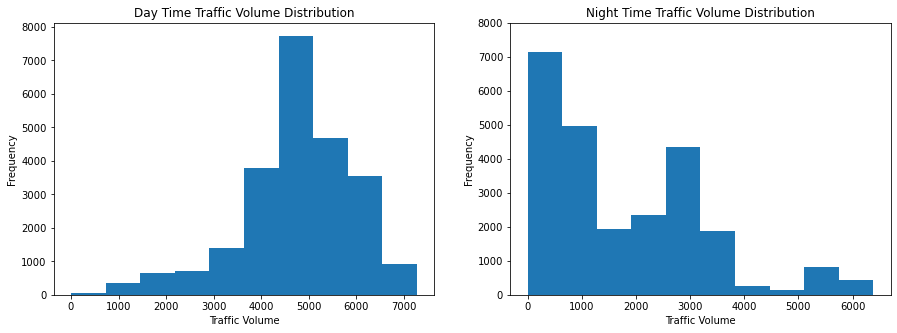

In [15]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(traffic_daytime['traffic_volume'])
plt.title('Day Time Traffic Volume Distribution')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1,2,2)
plt.hist(traffic_nighttime['traffic_volume'])
plt.title('Night Time Traffic Volume Distribution')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.ylim(0,8000)
plt.show()

In [16]:
traffic_daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [17]:
traffic_nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

Looking a the charts above we can see what appears to be a normal distribution for the day time traffic volume frequency, with the mean being 4,762 and the median being 4,820.

On the otherhand, the night time distribution is a right skewed distribution, which looks close to being exponential, although there is a frequency spike around 3,500. Nonetheless, even with the spike, the mean is still only 1,785 and the median is 1,287.

Given that our objective is to find indicators of heavy traffic, we will be excluding the night time traffic data.

## Date and time data analysis
Let's analyse the day time data by the following:
- Month
- Day of the week
- Time of day

### By month

In [18]:
traffic_daytime['month'] = traffic_daytime['date_time'].dt.month

In [19]:
traffic_by_month = traffic_daytime.groupby('month').mean()

In [20]:
traffic_by_month

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
month,,,,,
1,265.483409,0.015080,0.000631,58.554108,4495.613727
2,266.663789,0.004019,0.000000,51.550459,4711.198394
3,273.619940,0.015839,0.000000,56.827811,4889.409560
4,279.661071,0.105343,0.000000,59.221525,4906.894305
5,289.282668,0.130863,0.000000,56.548825,4911.121609
6,294.576068,0.271121,0.000000,48.612374,4898.019566
7,296.785052,4.412258,0.000000,42.176619,4595.035744
8,295.119191,0.228113,0.000000,42.556892,4928.302035
9,292.520287,0.289807,0.000000,45.184112,4870.783145


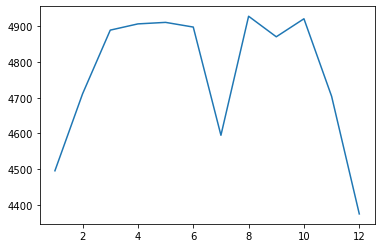

In [21]:
plt.plot(traffic_by_month.index,
        traffic_by_month['traffic_volume'])

plt.show()

It appears that traffic volume is lower in the cooler months (Nov through to Feb), however there is a notable exception for the month of July where traffic drops significantly. It is not clear what is happening in July, but it does potentially require further analysis. Nonetheless, for now we will proceed with looking at the data by day of the week.

### Day of the week

In [22]:
traffic_daytime['day_of_week'] = traffic_daytime['date_time'].dt.dayofweek

In [23]:
traffic_daytime

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,day_of_week
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10,1
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10,1
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10,1
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10,1
...,...,...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302,9,6
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,9,6
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,9,6
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,9,6


In [24]:
traffic_by_day_of_week = traffic_daytime.groupby('day_of_week').mean()

In [25]:
traffic_by_day_of_week

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month
day_of_week,,,,,,
0,282.262755,2.923823,0.000017,57.508053,4893.551286,6.401243
1,282.301770,0.129172,0.000194,52.333234,5189.004782,6.458757
2,282.198316,0.068099,0.001091,53.662119,5284.454282,6.619158
3,282.279115,0.172436,0.000148,53.993191,5311.303730,6.501184
4,282.181216,0.092828,0.000225,51.412200,5291.600829,6.575067
5,282.300646,0.107596,0.000094,50.446376,3927.249558,6.498821
6,282.280340,0.133170,0.000000,52.288699,3436.541789,6.604179


Note that in the above df the day_of_week index is 0 = Monday, 6 = Sunday

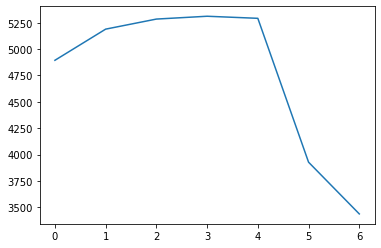

In [26]:
plt.plot(traffic_by_day_of_week.index,
        traffic_by_day_of_week['traffic_volume'])

plt.show()

From the above line we can clearly see that traffic is bussier on week days (Mon to Fri), with the weekend being notably less busy.

### Time of day

In [27]:
traffic_daytime['hour'] = traffic_daytime['date_time'].dt.hour

In [28]:
traffic_bus_days = traffic_daytime.copy()[traffic_daytime['day_of_week'] <= 4]

In [29]:
traffic_weekend = traffic_daytime.copy()[traffic_daytime['day_of_week'] >= 5]

In [30]:
traffic_by_hour_bus = traffic_bus_days.groupby('hour').mean()
traffic_by_hour_weekend = traffic_weekend.groupby('hour').mean()

In [31]:
traffic_by_hour_bus

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,day_of_week
hour,,,,,,,
7,278.662639,0.145105,0.000068,50.538983,6030.413559,6.363390,1.984407
8,278.938443,0.144614,0.000135,53.666441,5503.497970,6.567659,1.989175
9,279.628421,0.156829,0.000139,53.619709,4895.269257,6.484386,1.981263
10,280.664650,0.113984,0.000033,54.781417,4378.419118,6.481283,1.957888
11,281.850231,0.151976,0.000000,52.808876,4633.419470,6.448819,1.979957
12,282.832763,0.090271,0.001543,53.855714,4855.382143,6.569286,1.989286
13,283.292447,0.092433,0.000370,53.325444,4859.180473,6.465237,1.982988
14,284.091787,0.102991,0.000746,55.326531,5152.995778,6.588318,1.990852
15,284.450605,0.090036,0.000274,54.168467,5592.897768,6.541397,1.962563


In [32]:
traffic_by_hour_weekend

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,day_of_week
hour,,,,,,,
7,278.095331,0.291540,0.000000,50.006623,1589.365894,6.518212,5.501656
8,277.981017,0.083870,0.000083,48.877076,2338.578073,6.523256,5.503322
9,279.785660,0.075234,0.000364,49.688042,3111.623917,6.603120,5.492201
10,280.403811,0.079674,0.000103,48.915808,3686.632302,6.491409,5.503436
11,282.129355,0.141387,0.000000,52.372973,4044.154955,6.482883,5.491892
12,282.936119,0.095784,0.000000,51.418018,4372.482883,6.500901,5.493694
13,283.784951,0.180452,0.000000,53.095841,4362.296564,6.580470,5.497288
14,284.663261,0.087847,0.000000,52.735401,4358.543796,6.644161,5.500000
15,284.854578,0.074771,0.000000,52.148624,4342.456881,6.612844,5.506422


In the cells above we have split the traffic by day into a weekend df and week day df. This is because the by-hour analysis will likely look different for weekend days vs. weekends, given our by-day analysis above.

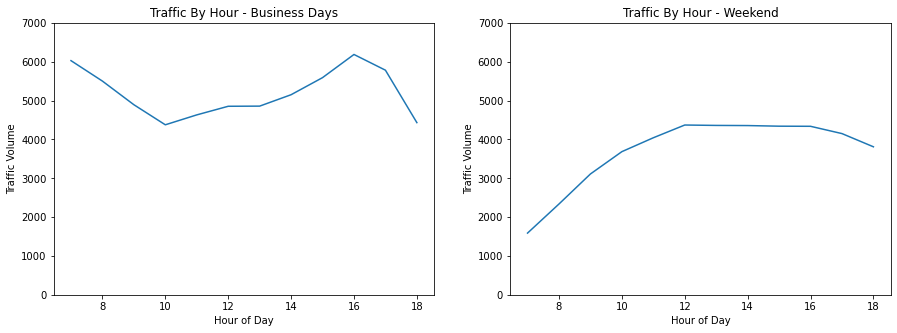

In [39]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(traffic_by_hour_bus.index, traffic_by_hour_bus['traffic_volume'])
plt.title('Traffic By Hour - Business Days')
plt.xlabel('Hour of Day')
plt.ylabel('Traffic Volume')
plt.ylim(0,7000)

plt.subplot(1,2,2)
plt.plot(traffic_by_hour_weekend.index, traffic_by_hour_weekend['traffic_volume'])
plt.title('Traffic By Hour - Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Traffic Volume')
plt.ylim(0,7000)

plt.show()

Looking at the above charts we can see a clear traffic volume patter for week days and weekends

**Week days**  <br>
On weeks days we can see a hight traffic volume at 7am which then declines towards the middle of the day before picking up again late in the afternoon, peaking again at 4PM to 5PM before declining to 6PM. This patter is consistent with typical 'peak hour' periods.

**Weekend**  <br>
On the weekend we can see a low traffic volume in the morning which steadily increases from 7AM through to 12PM. From 12PM onwards it stays relatively flat but does appear to be decreasing by 6PM. Notably, the peak traffic volumes on the weekend are less than even the lowest periods on week days.

# Weather Analysis

In [49]:
traffic_daytime.corr().loc[['temp','rain_1h','snow_1h','clouds_all','traffic_volume'],'traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

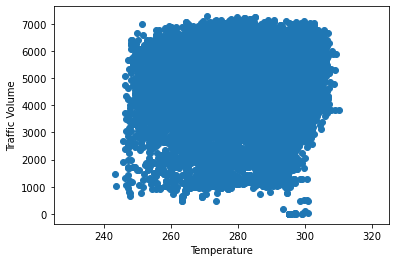

In [45]:
plt.scatter(traffic_daytime['temp'], traffic_daytime['traffic_volume'])
plt.xlabel("Temperature")
plt.ylabel("Traffic Volume")
plt.xlim(225,325)
plt.show()

Looking initially at the correlation between traffic volume and the weather data, there appears to be almost no correlation with rain, snow or clouds, however there is some small correlation with temperature. That being said, temp does still not appear to be a reliable indicator of traffic, which is further confirmed when we look at this on a scatter plot.

Let's look at the categorical weather data ("weather_main" and "weather_description")

In [54]:
traffic_weather_main = traffic_daytime.groupby('weather_main').mean()
traffic_weather_main

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,day_of_week,hour
weather_main,,,,,,,,
Clear,283.812078,0.000000,0.000000,1.670265,4778.416260,6.490599,3.138928,12.404248
Clouds,282.929274,0.000000,0.000000,62.667548,4865.415996,6.393243,3.005631,12.911974
Drizzle,284.456433,0.170804,0.000000,84.704417,4837.212911,7.105323,2.934315,12.308041
Fog,277.579641,0.163840,0.001409,65.477901,4372.491713,6.646409,2.798343,10.325967
Haze,275.319353,0.040036,0.000000,64.000000,4609.893285,5.832134,2.754197,12.467626
Mist,279.420825,0.249992,0.000825,74.961435,4623.976475,6.734285,2.895102,11.078288
Rain,287.089601,3.972943,0.000292,75.870116,4815.568462,6.774023,2.914467,12.642379
Smoke,292.405833,0.878333,0.000000,53.333333,4564.583333,6.833333,2.416667,13.166667
Snow,267.984505,0.014017,0.001768,80.501376,4396.321183,6.374828,2.750344,12.153370


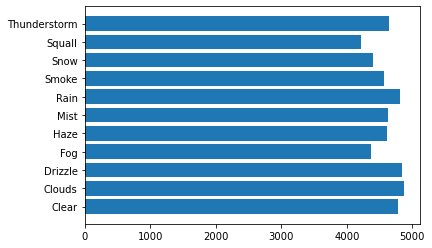

In [55]:
plt.barh(traffic_weather_main.index,traffic_weather_main['traffic_volume'])
plt.show()

In [56]:
traffic_weather_description = traffic_daytime.groupby('weather_description').mean()
traffic_weather_description

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,day_of_week,hour
weather_description,,,,,,,,
SQUALLS,296.730000,1.020000,0.000000,75.000000,4211.000000,7.000000,2.000000,14.000000
Sky is Clear,293.232549,0.000000,0.000000,0.000000,4919.009390,7.557512,2.895540,12.453052
broken clouds,282.372927,0.000000,0.000000,72.635875,4824.130326,6.675260,2.998210,12.811314
drizzle,283.573777,0.145072,0.000000,88.589928,4737.330935,7.244604,3.028777,11.697842
few clouds,284.272965,0.000000,0.000000,19.391951,4839.818023,6.159230,2.977253,12.633421
fog,277.579641,0.163840,0.001409,65.477901,4372.491713,6.646409,2.798343,10.325967
freezing rain,272.860000,0.000000,0.000000,90.000000,4314.000000,6.500000,0.500000,13.500000
haze,275.319353,0.040036,0.000000,64.000000,4609.893285,5.832134,2.754197,12.467626
heavy intensity drizzle,285.467931,0.276207,0.000000,89.172414,4738.586207,7.551724,2.896552,12.275862


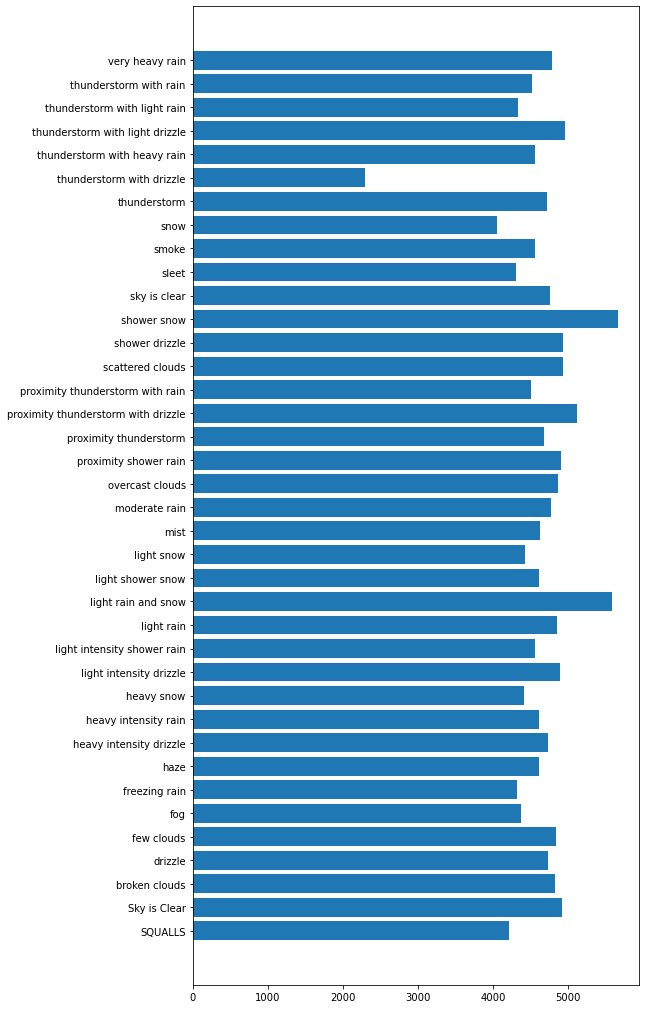

In [62]:
plt.figure(figsize=[8,18])
plt.barh(traffic_weather_description.index,traffic_weather_description['traffic_volume'])

plt.show()

Looking at the charts above we can see that "shower snow" and "light rain and snow" have a traffic volume that is greater than 5,000, which if we refer back to our traffic by hour analysis is the volume that aligns with peak hour during week days. Therefore, these two "weather description" values may also be reasonable indicators of high traffic volume. Whilst not as strong, we can also see that perhaps "proximity thunderstorm with drizzle" may also be an indicator.

# Conclusions
Based on the analysis that we have undertaken, we have identified three types of high traffic indicators:

**1. Time of year** <br>
We have observed that traffic is usually heavier during the warmer months of the year

**2. Week days** <br>
We have also observed that week days experience much higher traffic volumes that weekends.

**3. Time of day**  <br>
We can see that times consistent with typical peak hour (first thing is the morning and late in the afternoon) appears to be a good indicator of high traffic volumes.

**4. Weather (based on weather description)**  <br>
The weather description values "shower snow" and "light rain and snow" appear to be reasonable indicators of high traffic volumes given they are linked with traffic volumes that are similar to those observered during peak hour. Further, Whilst not as strong, we can also see that perhaps "proximity thunderstorm with drizzle" may also be an indicator.